In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colaboratory/Data_Analysis/global_cancer_patients_2015_2024.csv'


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
data.duplicated().sum()

np.int64(0)

#Descriptive Analysis - Age

In [ ]:
data["Age"]

,Age
0,71
1,34
2,80
3,40
4,43
...,...
49995,80
49996,40
49997,74
49998,21


###KDE Plot and Histograph - Age

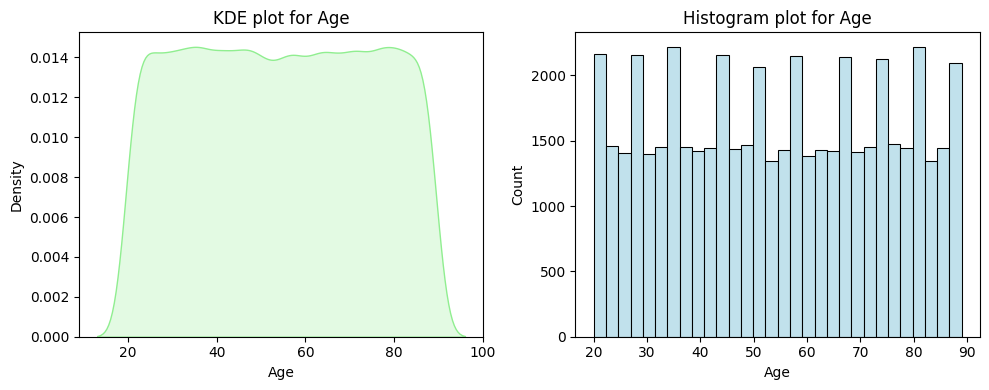

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color = "lightgreen")
plt.title('KDE plot for Age')

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde=False, color="lightblue")
plt.title('Histogram plot for Age')

plt.tight_layout()
plt.show()

In [ ]:
data["Age"].describe()


,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


## Inference
- Age Column is very diverse its not skewed. There is equal representation of  young and Old patients, Which supports age-based comparitive analysis

#Descriptive Analysis - Gender

- Equal Gender distribution

In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,16796
Female,16709
Other,16495


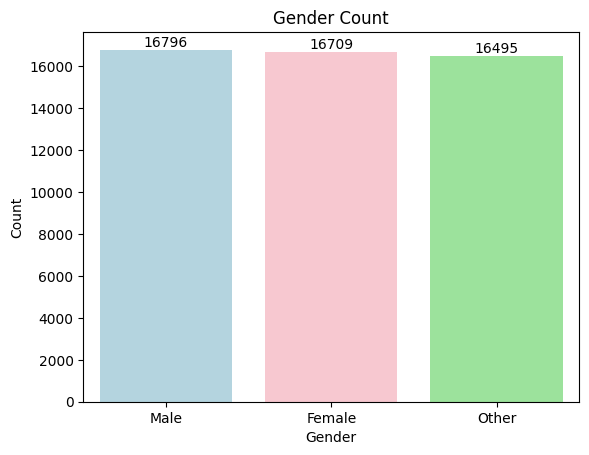

In [ ]:
sns.barplot(x=data["Gender"].value_counts().index,
            y= data["Gender"].value_counts().values,
            palette=["lightblue","pink","lightgreen"])

for i , v in enumerate(data["Gender"].value_counts()):
  plt.text(i,v, str(v), ha = "center", va="bottom")

plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Inference - Gender
- Equal Gender representation;  Gender distribution is sufficient for evaluating gender specific survival trends and severity outcomes.

## Discriptive Analysis - Country_Region

In [ ]:
country_counts = data["Country_Region"].value_counts()

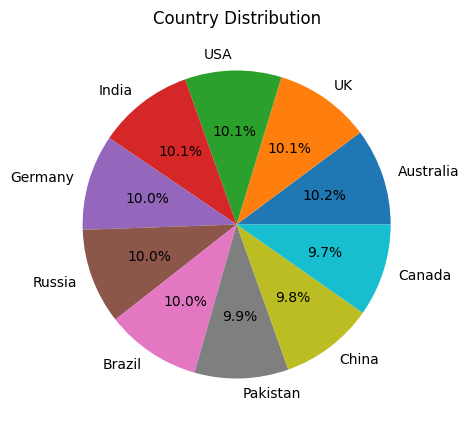

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels = country_counts.index,
        autopct='%1.1f%%')

plt.title("Country Distribution")
plt.show()

# Inference - Country_Region
- Patients come from 10 different countries, with Australia being most represented.
- This diversity enables cross-country comparision of cancer outcomes and treatment economic.


##Descriptive Analysis - Cancer_Type

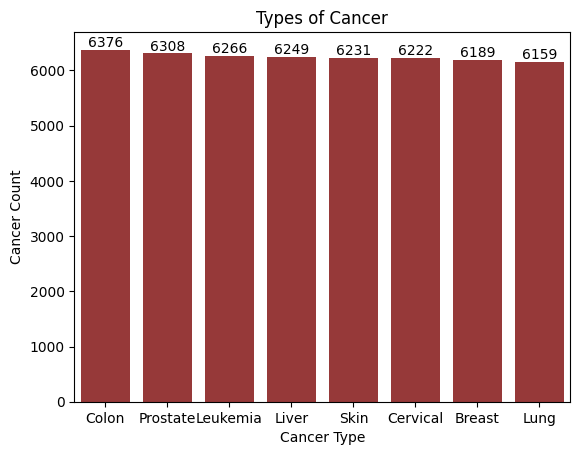

In [ ]:
data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y = data["Cancer_Type"].value_counts().values
            , color="brown")

for i,v in enumerate(data["Cancer_Type"].value_counts()):
  plt.text(i,v, str(v), ha="center", va="bottom")

plt.title('Types of Cancer')
plt.xlabel("Cancer Type")
plt.ylabel("Cancer Count")
plt.show()

## Inference - Cancer_Type
- There are 8 types of cancers
- With each type having around 6000-6300 patients
- Most common cancer is colon cancer followed by prostate cancer.

## Descriptive Analysis - Cancer_Stage

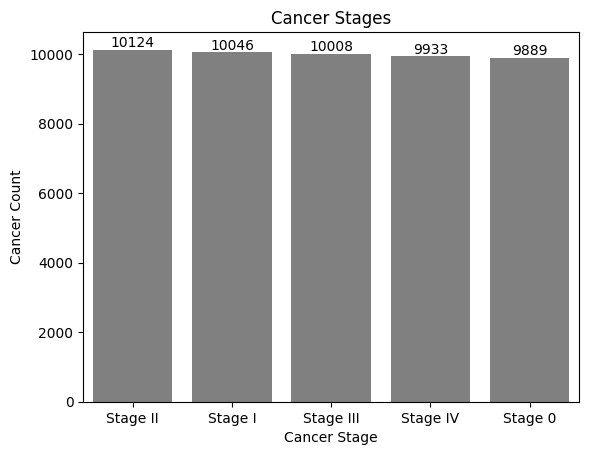

In [ ]:
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y = data["Cancer_Stage"].value_counts().values
            , color="grey")

for i,v in enumerate(data["Cancer_Stage"].value_counts()):
  plt.text(i,v, str(v), ha="center", va="bottom")

plt.title('Cancer Stages')
plt.xlabel("Cancer Stage")
plt.ylabel("Cancer Count")
plt.show()

## Inference - Cancer_Stage
- There are 5 stages with values ranging from 0 to 1
- Each stage have same no of patients under its label


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

## Descriptive Analysis - Treatment_Cost_USD


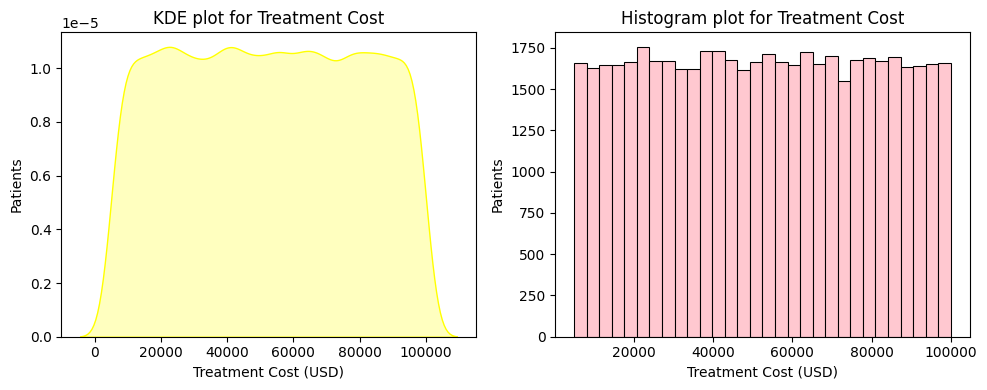

In [ ]:
data["Treatment_Cost_USD"]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color = "yellow")
plt.title('KDE plot for Treatment Cost')
plt.xlabel('Treatment Cost (USD)')
plt.ylabel('Patients')

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde=False, color="lightpink")
plt.title('Histogram plot for Treatment Cost')
plt.xlabel('Treatment Cost (USD)')
plt.ylabel('Patients')

plt.tight_layout()
plt.show()


## Inference - Treatment_Cost_USD
- This data column has no skewness.
- Max cost is 100K USD
- Min cost is 5k USD

## Descriptive Analysis - Risk Factors
- Air_Pollution
- Alcohol_Use
- Smoking
- Genetic_Risk
- Obesity_Level

In [ ]:
risk_factors =['Air_Pollution',
'Alcohol_Use',
'Smoking',
'Genetic_Risk',
'Obesity_Level']

### All the values are on standarized scale

In [ ]:
summary = data[risk_factors].agg(['mean', "std", "min","max"])
summary

,Air_Pollution,Alcohol_Use,Smoking,Genetic_Risk,Obesity_Level
mean,5.010126,5.010880,4.989826,5.001698,4.991176
std,2.888399,2.888769,2.881579,2.885773,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


# Inferences and Predictive Analysis


## The relationship between risk factors and cancer severity
- There are 5 risk factors


### How R² Explains Variance:
 R² shows the proportion of total variance in the dependent variable explained by the model. E.g., R² = 0.8 means 80% of variance is explained, 20% is unexplained (residual). It compares residual variance ($ SS_{\text{res}} $) to total variance ($ SS_{\text{tot}} $).

In [ ]:
risk_factors =['Air_Pollution',
'Alcohol_Use',
'Smoking',
'Genetic_Risk',
'Obesity_Level']

## Figures
- zig-zag dark lines are actual values
- and light colored lines/area is std error

R2 Scores are very less,  weak linear relationship between risks and cancer
- Not a strong relationship between indivisual risk factors and Severity Score, relationship is positive
- Indivisual Factors have very weak relationship and doesn't explain a lot.
- Maybe combining the risk factor can give more r2 score.
- Also other factors (not risk factors) are effecting the severity score.

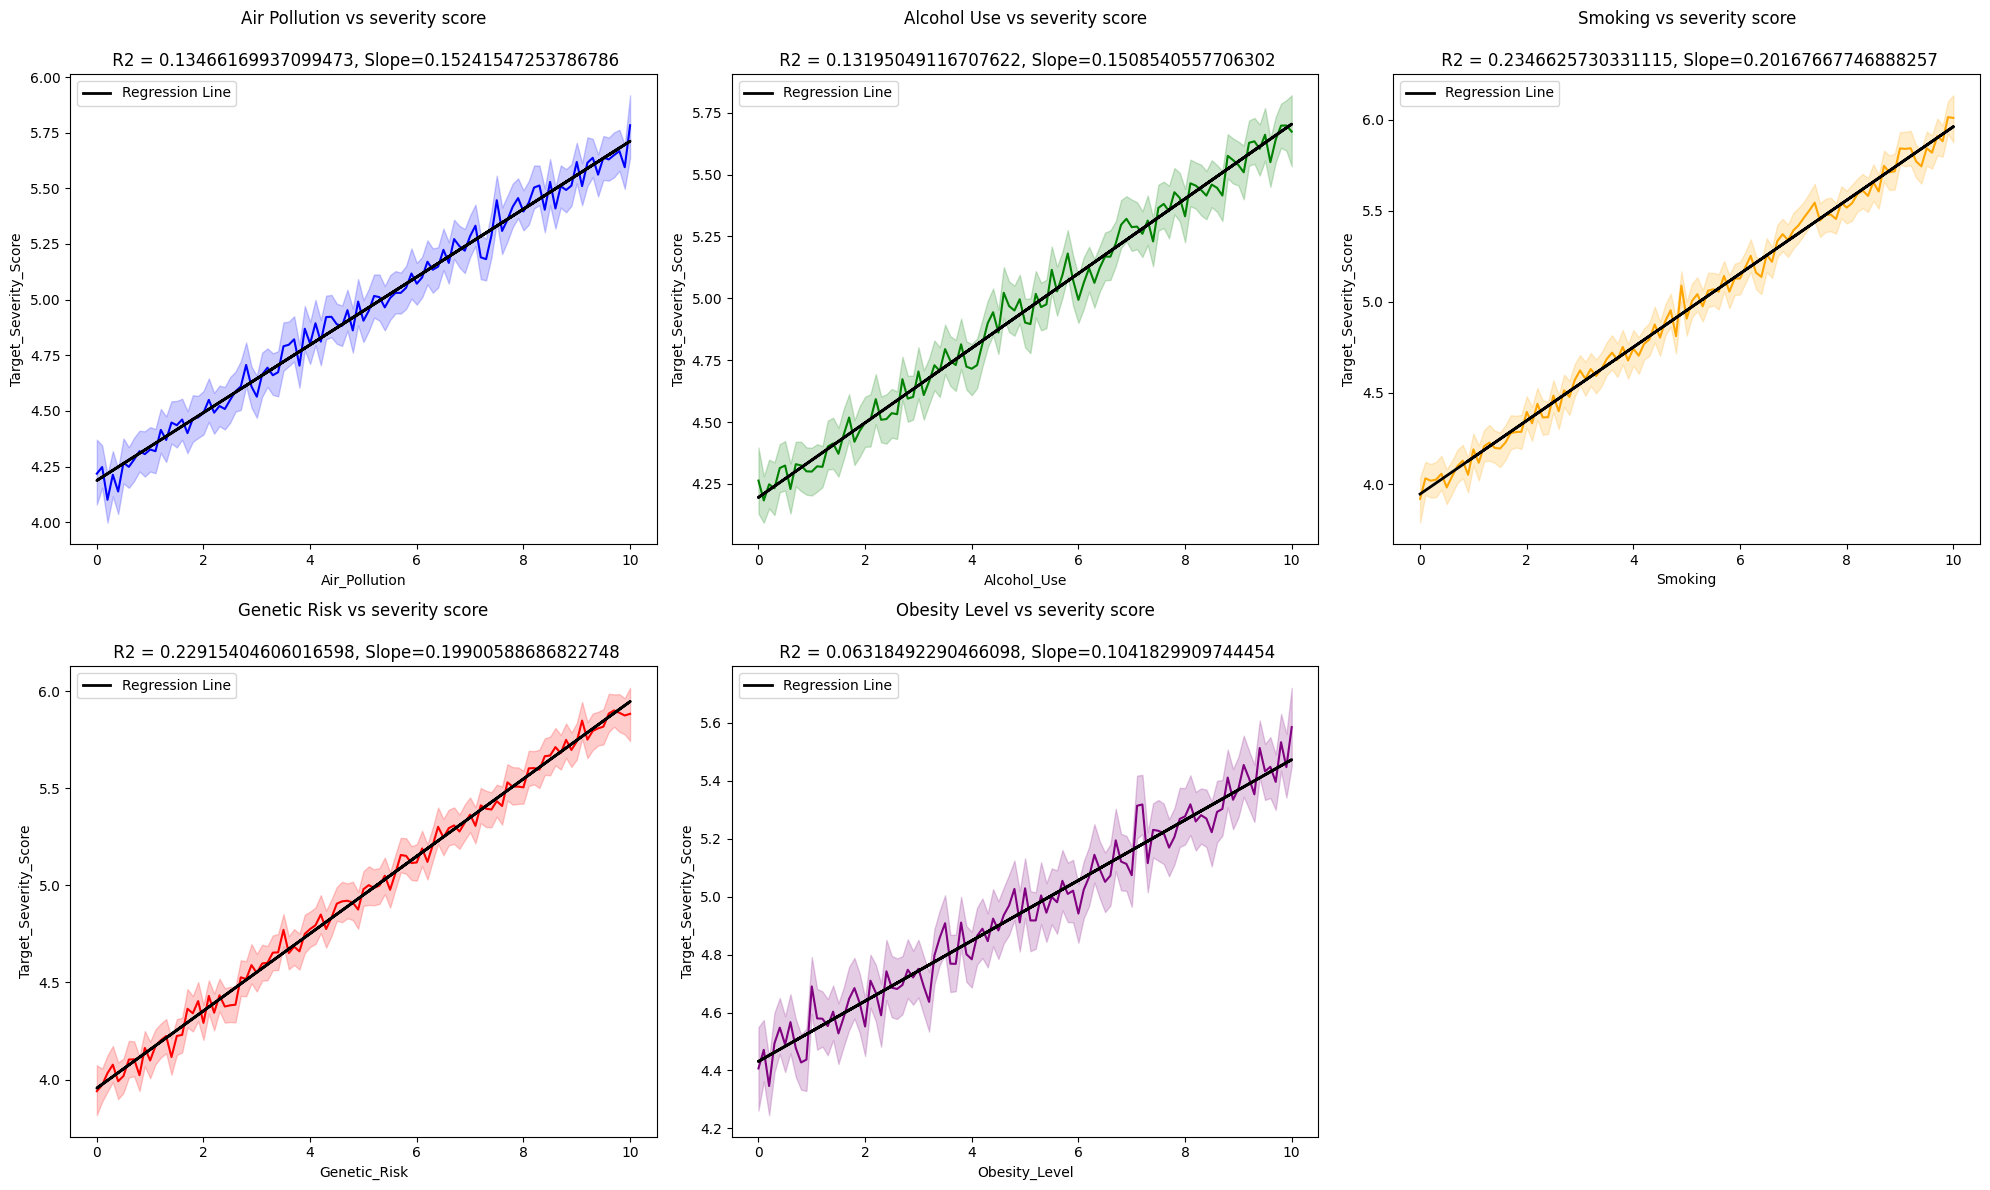

In [ ]:
from scipy.stats import  linregress

titles = ['Air Pollution',
'Alcohol Use',
'Smoking',
'Genetic Risk',
'Obesity Level']

colors = ['blue','green','orange','red','purple']

plt.figure(figsize=(20,12))
for i, (factor, title, color) in enumerate(zip(risk_factors,titles,colors),1):
  # print(i,title, color, factor)
  plt.subplot(2,3,i)

  x = data[factor]
  y = data["Target_Severity_Score"]
  linregress(x,y)
  slope, intercept, r_value, p_value, std_err = linregress(x,y)
  r_squared = r_value**2
  sns.lineplot(x=factor, y ="Target_Severity_Score", data=data, color = color)
  plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
  plt.title(f"{title} vs severity score\n\n R2 = {r_squared}, Slope={slope}")
  plt.xlabel(factor)
  plt.ylabel("Target_Severity_Score")
  plt.legend()


plt.tight_layout()
plt.show()

# Analysis of the porportion of early stage (0,1) diagnosis  by cancer type

In [ ]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [ ]:
stage_count = data[data["Cancer_Type"] == "Lung"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of Lung cancer patients that got it diagnosed at early stages: {proportion}")

In [ ]:
stage_count = data[data["Cancer_Type"] == "Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of Leukemia cancer patients that got it diagnosed at early stages: {proportion}")


Percentage of Leukemia cancer patients that got it diagnosed at early stages: 39.53080114905841


In [ ]:
stage_count = data[data["Cancer_Type"] == "Breast"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of Breast cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of Breast cancer patients that got it diagnosed at early stages: 39.47325900791727


In [ ]:
stage_count = data[data["Cancer_Type"] == "Colon"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of Colon cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of Colon cancer patients that got it diagnosed at early stages: 40.41718946047679


In [ ]:
stage_count = data[data["Cancer_Type"] == "Skin"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of skin cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of skin cancer patients that got it diagnosed at early stages: 40.41084898090194


In [ ]:
stage_count = data[data["Cancer_Type"] == "Liver"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of liver cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of liver cancer patients that got it diagnosed at early stages: 40.614498319731155


In [ ]:
stage_count = data[data["Cancer_Type"] == "Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of cervical cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of cervical cancer patients that got it diagnosed at early stages: 39.85856637737062


In [ ]:
stage_count = data[data["Cancer_Type"] == "Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0)
total_lung = stage_count.sum()
proportion = (early_stage_sum/total_lung)*100
print(f"Percentage of Prostate cancer patients that got it diagnosed at early stages: {proportion}")

Percentage of Prostate cancer patients that got it diagnosed at early stages: 40.187064045656314


### According to the above calculations, 38%-40% of all types of cancer cases are diagnosed at early stages (Stage 0 and 1) .


# Key predictors of cancer severity and survival years.
- Most important factors that have the maximum effect on severity and survival years.
- Correlation Analysis and Feature selection using random forest
- The cols that are common in both the tests, those will be important factors

## Correlation Analysis - Pearson and Spearman corelation
-  Most effective cols


## Feature selection
- If i consider all the factors, using feature selection i will find the factors that explains the most

In [ ]:
features = ['Age','Air_Pollution',
'Alcohol_Use',
'Smoking',
'Genetic_Risk',
'Obesity_Level' ]

target = ['Survival_Years', 'Target_Severity_Score']

## Correlations (Pearson and Spearman)
###Pearson Correlation
Pearson correlation measures the linear relationship between two continuous variables. It tells you how well the data points fit a straight line. The correlation coefficient ranges from -1 to 1:
- +1 = perfect positive linear relationship
- -1 = perfect negative linear relationship
- 0 = no linear relationship
- Pearson uses the actual values of the data and is sensitive to outliers. It works best when the data is normally distributed and the relationship between variables is linear.
### Spearman Correlation
Spearman correlation measures the monotonic relationship between two variables — that is, whether as one variable increases, the other consistently increases or decreases, regardless of the exact shape of the relationship. It is based on the ranked values of the data, not the raw values.

This method does not assume normality, is less sensitive to outliers, and can capture non-linear but monotonic trends. It is especially useful when dealing with ordinal data or when the relationship is non-linear but directional.
Summary

Use Pearson when you expect a straight-line relationship and the data is clean and normally distributed.
Use Spearman when the relationship is non-linear but consistent, or when the data is ordinal or has outliers.



In [ ]:
features = ['Age','Air_Pollution',
'Alcohol_Use',
'Smoking',
'Genetic_Risk',
'Obesity_Level' ]

targets = ['Survival_Years', 'Target_Severity_Score']

# Correlations

pearson_corr = data[features + targets].corr(method="pearson")
spearman_corr = data[features + targets].corr(method="spearman")


# Slice out the only the relationship w target variables
pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

# Combine both
correlation_df = pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson", "Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Genetic_Risk                0.001708              0.478700       0.001684   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Genetic_Risk                       0.472193  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

# Key Findings from Pearson & Spearman Correlation
###Target: Cancer Severity (Target_Severity_Score)
Most strongly correlated features (consistent in both Pearson and Spearman):
- Smoking — strongest positive correlation
- Genetic_Risk
- Air_Pollution
- Alcohol_Use
- Obesity_Level shows moderate correlation
- Age has almost no correlation
###Target: Survival Years
- All features show very weak or no correlation
- No strong linear or monotonic trend detected
- May need additional variables such as treatment type, cancer stage, or early detection
### Interpretation
- For severity prediction, focus on:
Smoking, Genetic Risk, Alcohol Use, Air Pollution
- For survival prediction, current features are not informative
Consider including more clinical or outcome-based variables




# Random Forest for Target Severity score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

### Converting categorical columns to numerical columns

In [ ]:
categorical_col = ["Gender", "Country_Region", "Cancer_Type", "Cancer_Stage"]
for col in categorical_col:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])

# Preparing features and input (x)
X  = data.drop(columns=["Patient_ID", "Survival_Years", "Target_Severity_Score", "Treatment_Cost_USD"])
y_sevirity = data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X,y_sevirity, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train_s, Y_train_s)

# Model Evalution
train_r2_severity = r2_score(Y_train_s, model.predict(X_train_s))
test_r2_severity = r2_score(Y_test_s, model.predict(X_test_s))


In [ ]:
print(train_r2_severity)
print(test_r2_severity)
# there is little-bit overfitting

0.9689886894803543
0.7683892517466495


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
randomc = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
random_search = RandomizedSearchCV(
    estimator=randomc,
    param_distributions=param_dist,
    n_iter=10,                 # number of random combos to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_s, Y_train_s)
# Best estimator
best_rf = random_search.best_estimator_
# Print best parameters
print("Best Parameters:", random_search.best_params_)
# Evaluate on test data
test_r2 = r2_score(Y_test_s, best_rf.predict(X_test_s))
print("Test R² Score:", test_r2)

In [ ]:
feature_importance_severity = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

## Severity Important features plotted

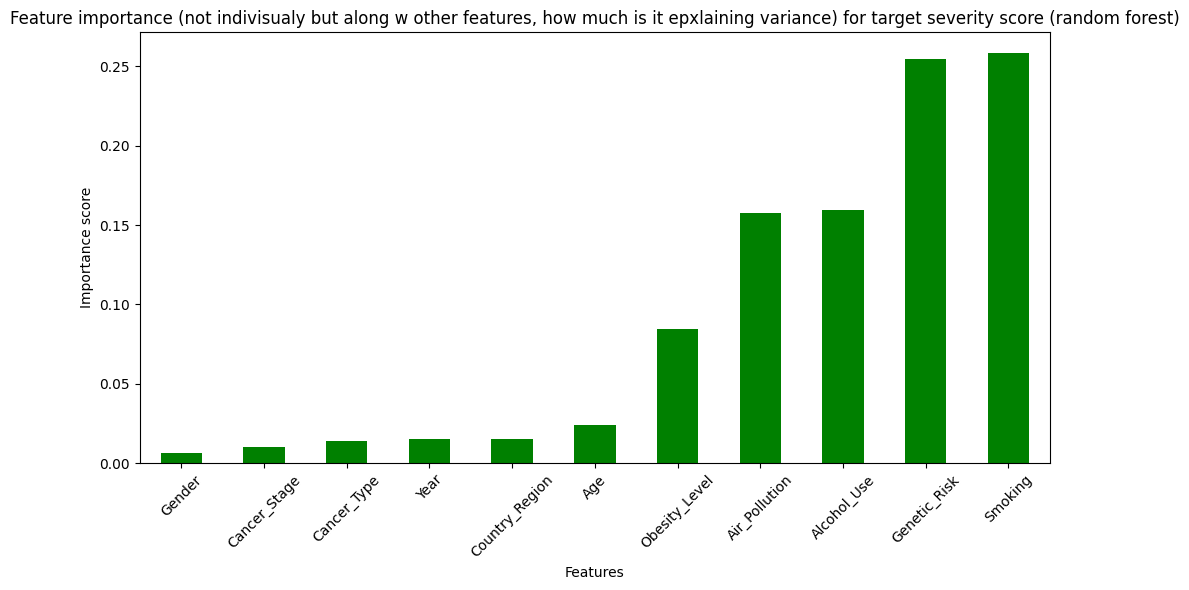

In [ ]:
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color='green')
plt.title('Feature importance (not indivisualy but along w other features, how much is it epxlaining variance) for target severity score (random forest)')
plt.xlabel("Features")
plt.ylabel("Importance score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random forest for Survival years

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# encode categoricals
categorical_cols = ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# features / target
X = data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity = data["Survival_Years"]   # note: this is survival, not severity

# split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=40)

# search space
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# model + grid search (parallelize RF too)
base_rf = RandomForestRegressor(random_state=40, n_jobs=-1)
GSC = GridSearchCV(base_rf, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2)
GSC.fit(X_train_s, y_train_s)

best_rf_severity = GSC.best_estimator_

# evaluation
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity  = r2_score(y_test_s,  best_rf_severity.predict(X_test_s))

print("Best params:", GSC.best_params_)
print("Train R^2:", train_r2_severity)
print("Test  R^2:", test_r2_severity)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Train R^2: 0.008998065861791305
Test  R^2: -0.00034873523017031616


## Target survival is not getting explained very well with are selected features.
- r2 score is very bad
- There might be data quality issues as well


In [ ]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.00034873523017031616


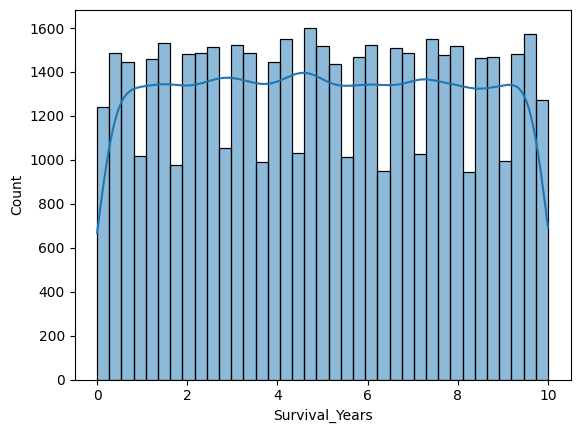

In [ ]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)
plt.show()

### There is no relation between Survival years and the feature cols that are selected

In [ ]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

,Survival_Years
Gender,-0.007121
Cancer_Stage,-0.003014
Cancer_Type,-0.001717
Alcohol_Use,-0.000527
Treatment_Cost_USD,-0.000429
Age,-0.000147
Year,0.000018
Air_Pollution,0.000893
Smoking,0.001371
Genetic_Risk,0.001708


# The Economic burden of cancer treatment across different demographics and countries

In [ ]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92
1,PT0000001,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65
2,PT0000002,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84
3,PT0000003,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12
4,PT0000004,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,1,6,2023,2.3,7.5,2.8,3.8,2.9,3,0,71463.70,1.0,3.63
49996,PT0049996,40,0,9,2018,6.4,3.5,2.9,9.0,9.8,2,1,49619.66,0.4,6.03
49997,PT0049997,74,1,6,2015,6.2,1.6,8.7,4.7,4.0,0,0,5338.25,2.7,6.02
49998,PT0049998,21,1,1,2018,4.0,6.5,7.6,8.6,8.1,4,4,45100.47,7.5,6.54


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data["Age_Group"] = pd.cut(data["Age"], bins=[0,30,45,60,75,100], labels=["0-30", "31-45", "46-60", "61-75", "76+"])

In [ ]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


In [ ]:
country_age_cost = data.groupby(["Country_Region", "Age_Group", "Gender"])["Treatment_Cost_USD"].mean().reset_index()
print(country_age_cost)

    Country_Region Age_Group  Gender  Treatment_Cost_USD
0        Australia      0-30  Female        53287.701319
1        Australia      0-30    Male        52939.875035
2        Australia      0-30   Other        53776.208452
3        Australia     31-45  Female        51647.694000
4        Australia     31-45    Male        54212.453438
..             ...       ...     ...                 ...
145            USA     61-75    Male        55381.892304
146            USA     61-75   Other        52070.474766
147            USA       76+  Female        51877.032768
148            USA       76+    Male        52445.346342
149            USA       76+   Other        55121.609724

[150 rows x 4 columns]


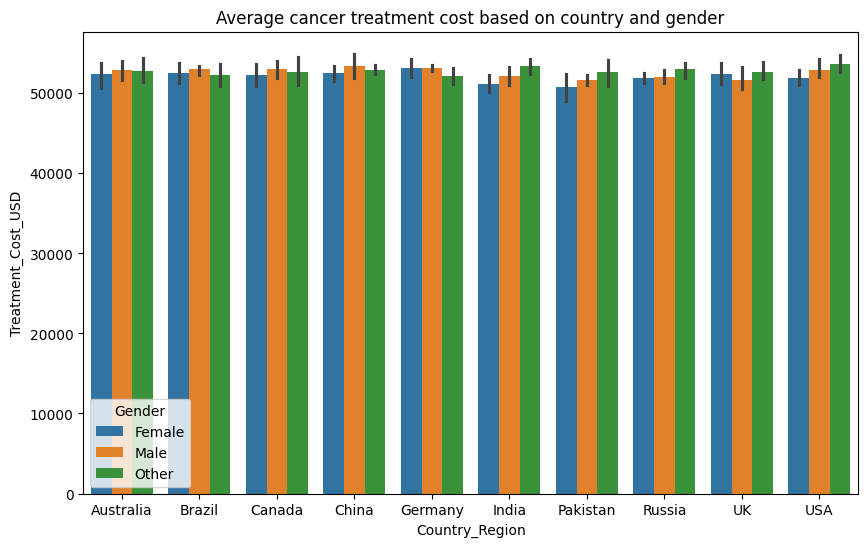

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost, x="Country_Region",y="Treatment_Cost_USD", hue="Gender")
plt.title("Average cancer treatment cost based on country and gender")
plt.show()

In [ ]:
country_age_cost = data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()
print(country_age_cost)

   Country_Region Age_Group  Treatment_Cost_USD
0       Australia      0-30        53315.916090
1       Australia     31-45        52290.210149
2       Australia     46-60        50887.310424
3       Australia     61-75        51827.812279
4       Australia       76+        54922.283170
5          Brazil      0-30        53814.974610
6          Brazil     31-45        53178.611181
7          Brazil     46-60        52650.893070
8          Brazil     61-75        51854.086124
9          Brazil       76+        51448.451094
10         Canada      0-30        52583.063081
11         Canada     31-45        53055.260081
12         Canada     46-60        52579.183330
13         Canada     61-75        52123.439015
14         Canada       76+        52561.921587
15          China      0-30        53168.658869
16          China     31-45        51782.313638
17          China     46-60        53075.659509
18          China     61-75        53438.460704
19          China       76+        53109

In [ ]:
heatmap_data = country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

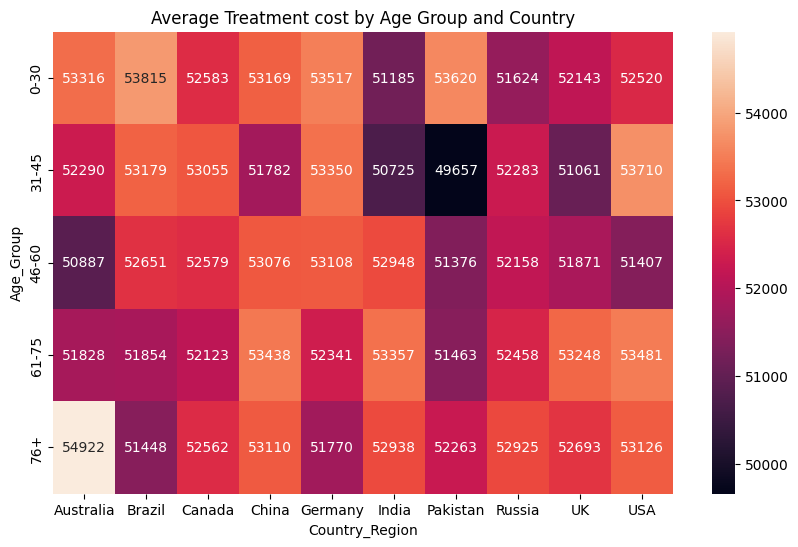

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment cost by Age Group and Country")
plt.show()

# Does higher treatment cost is associated with longer survival
- using pearson and spearman correlations

- Null Hypothesis (H0) : There is no correlation between treatment cost and survival years.
- Alternative Hypothesis (H1) : There is a correlation (+ve or -ve) between treatment cost and survival years

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
x = data["Treatment_Cost_USD"]
y = data["Survival_Years"]

# pearson correlation tests
pearson_corr, pearson_p = pearsonr(x,y)
print(pearson_corr, "\n", pearson_p)

# spearman correlation tests
spearman_corr, spearman_p = pearsonr(x,y)
print(spearman_corr, "\n", spearman_p)

-0.00042940542830214993 
 0.9235082012963275
-0.00042940542830214993 
 0.9235082012963275


There doesn't exist any correlation between Treatment costs and survival years


In [ ]:
alpha = 0.05
def interpret_corr(corr, p, method):
  if p<alpha:
    print(f"{method}, Null hypothesis is rejected ")
  else:
    print("f{method}, Failed to reject the null hypothesis")


interpret_corr(pearson_corr, pearson_p, "Pearson")
interpret_corr(spearman_corr, spearman_p, "Spearman")

f{method}, Failed to reject the null hypothesis
f{method}, Failed to reject the null hypothesis


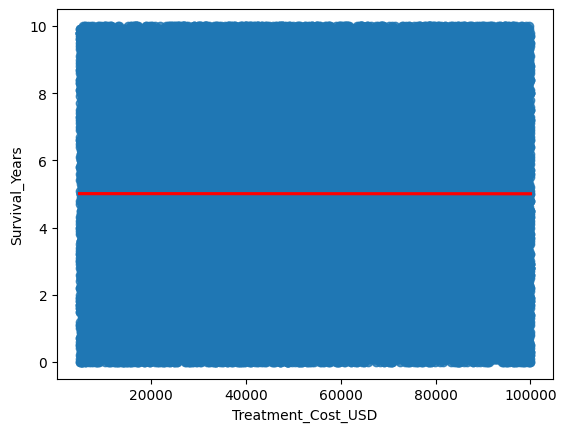

In [ ]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

### Since we failed to reject the null hypothesis -> there is no correlation between treatment cost and survival years, and figure also shows that.

# Evaluate if higher cancer stages lead to greated treatment cost and reduced survival years

In [ ]:
df = data.copy()

In [ ]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV', ]

In [ ]:
df.groupby("Cancer_Stage")[["Treatment_Cost_USD", "Survival_Years"]].mean().reset_index()

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


## Using hypothesis testing

## Treatment cost vs Cancer Stage
- Null Hypothesis  : The average treatment cost is the same across all cancer stages
- Alternative Hypothesis : Atleast one cancer stage has a different average cost.

## Survival years vs Cancer Stage
- Null Hypothesis : The average survival years are the same accross all cancer stages
Alternative Hypothesis : At least one stage has a different survival duration

In [ ]:
group_cost = []
group_survival = []

for stage in stage_order:
  stage_data = df[df["Cancer_Stage"] == stage]
  cost = stage_data["Treatment_Cost_USD"]
  survival = stage_data["Survival_Years"]
  group_cost.append(cost)
  group_survival.append(survival)

In [ ]:
group_cost


[1        12573.41
 6         9790.83
 17       56875.63
 22       89075.81
 29       32889.23
            ...   
 49988    52763.24
 49989    30400.57
 49995    71463.70
 49997     5338.25
 49999    64023.82
 Name: Treatment_Cost_USD, Length: 9889, dtype: float64,
 3        67446.25
 7        17161.40
 10       15093.39
 11       72315.19
 19       40131.04
            ...   
 49979     9090.63
 49981    94507.13
 49987    51598.72
 49993    75193.19
 49996    49619.66
 Name: Treatment_Cost_USD, Length: 10046, dtype: float64,
 2         6984.33
 8        56458.48
 9        56133.45
 12       99120.52
 13       94210.93
            ...   
 49973    58707.61
 49978    88123.42
 49990    38290.91
 49991    73592.91
 49992    99623.46
 Name: Treatment_Cost_USD, Length: 10124, dtype: float64,
 0        62913.44
 4        77977.12
 16       59285.13
 28       97036.73
 31       65719.90
            ...   
 49968    46434.35
 49976    52551.96
 49980    72094.76
 49983    47086.44
 49994    

## Checking for Normality for ANOVA

In [ ]:
from scipy.stats import shapiro, f_oneway

normal_cost = 0
normal_survival = 0

for i in range(len(stage_order)):
  cost_p = shapiro(group_cost[i]).pvalue
  surv_p = shapiro(group_survival[i]).pvalue
  print(f"{cost_p} for group {i} ")
  print(f"{surv_p} for group {i} ")
  if cost_p < 0.05:
    normal_cost +=1
  if surv_p < 0.05:
    normal_survival+= 1

1.5471821061637387e-47 for group 0 
1.6291039522109283e-47 for group 0 
7.306523956950957e-48 for group 1 
7.575551046259697e-48 for group 1 
8.943579643043388e-48 for group 2 
4.041659465829829e-48 for group 2 
5.267270033022367e-48 for group 3 
1.3648520457944784e-47 for group 3 
1.5838640189581322e-47 for group 4 
2.2992598289836786e-47 for group 4 


In [ ]:
print(normal_cost)
print(normal_cost)

5
5


## SO, 5 tells us that Not even a single group is Noramlly distributed, which means we can't apply ANOVA yet.

In [ ]:
from scipy.stats import kruskal


In [ ]:
kruskal_cost = kruskal(*group_cost)
kruskal_survival = kruskal(*group_survival)

p_cost = kruskal_cost.pvalue
p_surv = kruskal_survival.pvalue

### both the pvalues above using kruskal are greater than 0.05 and therefore I fail to reject the Null Hypothesis

In [ ]:
print(p_cost)
print(p_surv)

0.4254451689062656
0.6033078729984223


# Examining whether higher genetic risk amplifies the negative effects of smoking on cancer severity

- Null Hypothesis : The interaction effect between genetic risk and smoking on cancer_Severity is not significant

- Alternative H : The interaction effect between genetic risk and smokng on cancer severity is significant

- The interaction term : it tells if there is one variable that is effecting some output, Is there any other variable that is interacting/influencing this variable and effecting the output.


- cancer severity = B0 + B1(genetic risk) + B2(Smoking) + B3(genetic risk * smoking)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols("Target_Severity_Score ~ Genetic_Risk * Smoking", data = data).fit()

In [ ]:
model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

,Genetic_Risk:Smoking
Coef.,-0.000228
Std.Err.,0.000471
t,-0.484187
P>|t|,0.628255
[0.025,-0.001150
0.975],0.000694


### Test used : Multiple linear regression with interaction term
here p > 0.05 => we fail to reject the null hypothesis, which means we fail to reject that interaction effect between genetic risk and smoking on cancer severity is not significant. We failed to reject this.